<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plots" data-toc-modified-id="Plots-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plots</a></span></li><li><span><a href="#ALL" data-toc-modified-id="ALL-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ALL</a></span></li><li><span><a href="#ALL---NO2" data-toc-modified-id="ALL---NO2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ALL - NO2</a></span><ul class="toc-item"><li><span><a href="#YEAR" data-toc-modified-id="YEAR-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>YEAR</a></span></li><li><span><a href="#D" data-toc-modified-id="D-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>D</a></span></li><li><span><a href="#N" data-toc-modified-id="N-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>N</a></span></li><li><span><a href="#O" data-toc-modified-id="O-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>O</a></span></li><li><span><a href="#S" data-toc-modified-id="S-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>S</a></span></li><li><span><a href="#W" data-toc-modified-id="W-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>W</a></span></li><li><span><a href="#MONTH" data-toc-modified-id="MONTH-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>MONTH</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
file = '../data/5sta(DNOWS)_3com(NO2,PM10K,O3)_year2010_TemporalDummies_Ox.csv'
df_org = pd.read_csv(file, index_col=0, parse_dates=True
                )
df_org

In [3]:
months = sorted([i for i in df_org.columns if 'month_' in i])
factors = ['NO2', 'PM10K', 'O3', 'Ox']

In [4]:
df_org.columns

Index(['D_NO2', 'D_PM10K', 'N_NO2', 'N_O3', 'N_PM10K', 'O_NO2', 'O_PM10K',
       'S_NO2', 'S_O3', 'S_PM10K', 'W_NO2', 'W_PM10K', 'year', 'dayofyear',
       'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan',
       'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov',
       'month_Oct', 'month_Sep', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'season_fall', 'season_spring',
       'season_summer', 'season_winter', 'N_Ox', 'S_Ox'],
      dtype='object')

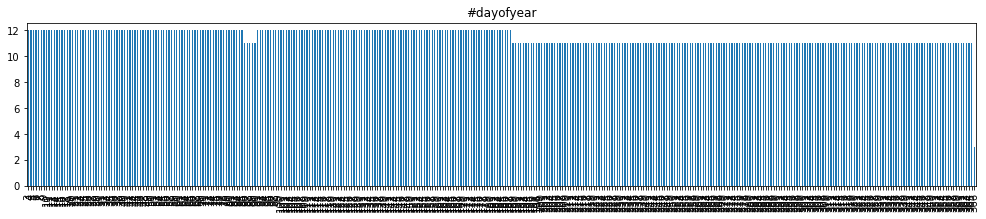

In [5]:
a = df_org['dayofyear'].value_counts().sort_index()
a.plot.bar(figsize=(17, 3))
plt.title('#dayofyear')
plt.show();

In [ ]:
df_org[df_org['dayofyear']==366]

In [ ]:
df_org.describe().T

In [149]:
df = pd.concat([df_org.iloc[:, :12], df_org.iloc[:, -2:]], axis=1)
cols = []
for f in factors:
    for c in sorted(df.columns):
        if f not in c: continue
        cols.append(c)
df = df[cols]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
D_NO2,4177.0,43.574199,15.698322,8.024886,32.481518,41.671497,52.239890,137.524250
N_NO2,4177.0,21.808625,12.631127,1.144127,12.350074,18.415941,29.199263,93.462555
O_NO2,4177.0,28.756654,13.302504,1.981802,19.231106,26.405266,36.207573,102.040640
S_NO2,4177.0,29.787456,14.946322,2.919650,19.170780,26.351784,37.671535,116.251520
W_NO2,4177.0,26.562450,13.606479,2.341851,16.582745,23.776577,34.365726,102.439360
D_PM10K,4177.0,30.412091,17.181764,2.248819,18.873556,26.145586,37.964490,141.548540
N_PM10K,4177.0,22.573188,13.088543,0.000000,13.585777,19.806145,28.339638,119.885475
O_PM10K,4177.0,29.302954,16.359887,4.071145,17.942915,24.923760,36.712193,130.208820
S_PM10K,4177.0,29.176028,18.246191,3.718005,16.598820,23.810854,36.867650,138.784260
W_PM10K,4177.0,24.601936,14.785938,1.535183,14.404179,21.113316,31.224894,125.431984


# Plots

In [ ]:
for f in factors:
    for c in sorted(df.columns):
        if f not in c: continue
        df[c].hist(bins=200, figsize=(8, 2));
        plt.title(c)
        plt.show()

In [ ]:
df_org.reset_index(inplace=True)
df_org

# ALL

In [80]:
df_org.set_index('index', inplace=True)

In [ ]:
for f in factors:
    cols = sorted([i for i in df_org.columns if f in i])
    a = df_org[cols].stack().reset_index()#.set_index('index')
    a.columns = ['Date', 'Area', f]
    fig = px.line(a, x='Date', y=f, 
               color='Area', title=f)
    fig.show();

In [134]:
a

,0
D_NO2,43.574199
N_NO2,21.808625
O_NO2,28.756654
S_NO2,29.787456
W_NO2,26.562450


In [ ]:
for f in factors:
    cols = sorted([i for i in df.columns if f in i])
    a = pd.DataFrame(df[cols].mean(), columns=[f'{f}_Avg'])
    fig = px.bar(a.round(1), y=f'{f}_Avg', text=f'{f}_Avg')
    fig.update_layout(height=350, width=450)
    fig.show();
#     break

# ALL - NO2

In [116]:
def plot_all_separate(col):
    for c in sorted(df.columns):
        if col not in c: continue
        a = df[[c]].copy()
        a['avg'] = a[c].mean()
        fig = px.line(a, title=c)    
        fig.show()

In [ ]:
col = 'NO2'
plot_all_separate(col)

In [ ]:
col = 'PM10K'
plot_all_separate(col)

In [ ]:
col = 'O3'
plot_all_separate(col)

In [ ]:
col = 'Ox'
plot_all_separate(col)

In [166]:
def plot_avg(col):
    cols = [c for c in sorted(df_org.columns) if col in c]
    a = df_org.groupby('year')[cols].mean()
    fig = px.bar(a, barmode='group', title=col)
    fig.show()

In [ ]:
for col in factors:
    plot_avg(col)

## YEAR

In [123]:
def plot_year(col):
    for col in sorted([i for i in df_org.columns if col in i]):    
        fig = px.line(df_org, x='dayofyear', y=col, 
                   color='year', title=col)
        fig.show();

## D

In [ ]:
col = 'D_'
plot_year(col)

## N

In [ ]:
col = 'N_'
plot_year(col)

## O

In [ ]:
col = 'O_'
plot_year(col)

## S

In [ ]:
col = 'S_'
plot_year(col)

## W

In [ ]:
col = 'W_'
plot_year(col)

## MONTH

In [169]:
def plot_monthly(col):
    for m in months:
        a = df_org[df_org[m]==1]
        fig = px.line(a, x='dayofyear', y=col, 
                   color='year', title=m)
        fig.show()

In [ ]:
col = 'D_NO2'
plot_monthly(col)

In [ ]:
col = 'D_PM10K'
for m in months:
    a = df_org[df_org[m]==1]
    fig = px.line(a, x='dayofyear', y=col, 
               color='year', title=m)
    fig.show()